In [11]:
import pandas as pd
from os import chdir
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import ResidualsPlot
from sklearn import metrics

%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

wd = "/Users/geoffrey.kip/Projects/sparcs_data"
chdir(wd)


In [2]:
sparcs_df= pd.read_csv("/Users/geoffrey.kip/Projects/sparcs_data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv")

/Users/geoffrey.kip/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sparcs_df["Length of Stay"] = pd.to_numeric(sparcs_df['Length of Stay'], errors="coerce")
columns_to_keep = ["APR Medical Surgical Description", "APR Risk of Mortality", "APR Severity of Illness Description",
              "Abortion Edit Indicator", "Age Group", "Emergency Department Indicator", "Ethnicity", "Gender",
              "Health Service Area", "Race","Type of Admission", "Length of Stay","Birth Weight",
               "Total Charges", "Total Costs","CCS Procedure Description"]
sparcs_df = sparcs_df[columns_to_keep]
sparcs_df.fillna(method="ffill",inplace=True)
sparcs_df.head()

,APR Medical Surgical Description,APR Risk of Mortality,APR Severity of Illness Description,Abortion Edit Indicator,Age Group,Emergency Department Indicator,Ethnicity,Gender,Health Service Area,Race,Type of Admission,Length of Stay,Birth Weight,Total Charges,Total Costs,CCS Procedure Description
0,Medical,Minor,Moderate,N,70 or Older,Y,Not Span/Hispanic,F,Western NY,White,Urgent,4.00,0,5333.90,4818.42,NO PROC
1,Medical,Moderate,Moderate,N,70 or Older,Y,Not Span/Hispanic,F,Western NY,White,Elective,4.00,0,4865.99,4588.78,NO PROC
2,Medical,Minor,Minor,N,70 or Older,Y,Not Span/Hispanic,F,Western NY,White,Urgent,4.00,0,5901.54,5559.56,ELECTROCARDIOGRAM
3,Medical,Minor,Moderate,N,50 to 69,Y,Not Span/Hispanic,F,Western NY,White,Elective,2.00,0,3619.08,3567.25,NO PROC
4,Medical,Moderate,Minor,N,70 or Older,Y,Not Span/Hispanic,M,Western NY,White,Elective,2.00,0,3185.87,3167.89,NO PROC


In [32]:
sparcs_df.shape

(2346931, 16)

In [33]:
sparcs_df.isnull().sum()

APR Medical Surgical Description       0
APR Risk of Mortality                  0
APR Severity of Illness Description    0
Abortion Edit Indicator                0
Age Group                              0
Emergency Department Indicator         0
Ethnicity                              0
Gender                                 0
Health Service Area                    0
Hospital County                        0
Race                                   0
Type of Admission                      0
Length of Stay                         0
Birth Weight                           0
Total Charges                          0
Total Costs                            0
dtype: int64

In [34]:
sparcs_df.dtypes

APR Medical Surgical Description        object
APR Risk of Mortality                   object
APR Severity of Illness Description     object
Abortion Edit Indicator                 object
Age Group                               object
Emergency Department Indicator          object
Ethnicity                               object
Gender                                  object
Health Service Area                     object
Hospital County                         object
Race                                    object
Type of Admission                       object
Length of Stay                         float64
Birth Weight                             int64
Total Charges                          float64
Total Costs                            float64
dtype: object

In [35]:
sparcs_df.describe()

,Length of Stay,Birth Weight,Total Charges,Total Costs
count,2346931.00,2346931.00,2346931.00,2346931.00
mean,5.40,326.56,43214.81,14732.54
std,7.42,1000.33,80460.09,28198.90
min,1.00,0.00,0.01,0.00
25%,2.00,0.00,12028.61,4410.15
50%,3.00,0.00,23486.37,8191.27
75%,6.00,0.00,46616.70,15771.82
max,119.00,9900.00,7248390.82,3007712.73


In [36]:
# Specifically Look at total charges
charges = sparcs_df["Total Charges"]
# TODO: Minimum total charges
minimum_charges = np.min(charges)

# TODO: Maximum total chages
maximum_charges = np.max(charges)

# TODO: Mean charges of the data
mean_charges = np.mean(charges)

# TODO: Median price of the data
median_charges = np.median(charges)

# TODO: Standard deviation of prices of the data
std_charges = np.std(charges)

# Show the calculated statistics
print ("Statistics for Ny Hospital Inpatient Discharges:\n")
print ("Minimum charge: ${:,.2f}".format(minimum_charges))
print ("Maximum charge: ${:,.2f}".format(maximum_charges))
print ("Mean charge: ${:,.2f}".format(mean_charges))
print ("Median charge ${:,.2f}".format(median_charges))
print ("Standard deviation of charge: ${:,.2f}".format(std_charges))

Statistics for Ny Hospital Inpatient Discharges:

Minimum charge: $0.01
Maximum charge: $7,248,390.82
Mean charge: $43,214.81
Median charge $23,486.37
Standard deviation of charge: $80,460.07


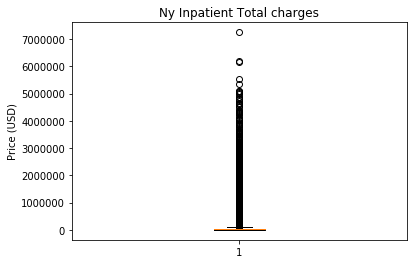

In [37]:
# Boxplot of prices to get a sense of the data

import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Ny Inpatient Total charges")
plt.ylabel("Price (USD)")
plt.boxplot(charges)
plt.show()


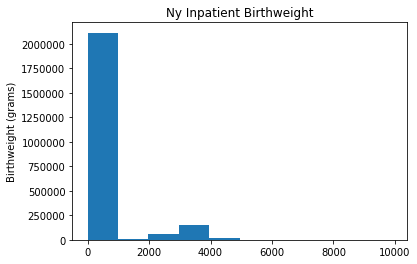

In [38]:
# Boxplot of birth to get a sense of the data
birth_weight = sparcs_df["Birth Weight"]
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Ny Inpatient Birthweight")
plt.ylabel("Birthweight (grams)")
plt.hist(birth_weight)
plt.show()


In [60]:
sparcs_df["CCS Procedure Description"].value_counts()

NO PROC                    610253
OTHER THERAPEUTIC PRCS     175269
OT PRCS TO ASSIST DELIV     83664
PROPHYLACTIC VAC/INOCUL     81104
CESAREAN SECTION            74822
RESP INTUB/MECH VENTIL      74082
ALCO/DRUG REHAB/DETOX       59131
PSYCHO/PSYCHI EVAL/THER     53451
CIRCUMCISION                45879
OPHTHALM-/OT-OLOGIC DX      40879
BLOOD TRANSFUSION           39767
ARTHROPLASTY KNEE           38491
REPAIR CUR OBS LACERATN     35380
HIP REPLACEMENT,TOT/PRT     32522
UP GASTRO ENDOSC/BIOPSY     27745
DX CARDIAC CATHETERIZTN     27346
DX ULTRASOUND HEART         26626
OTHER RESP THERAPY          25161
SPINAL FUSION               24449
HEMODIALYSIS                24338
PERC TRANSLUM COR ANGIO     24205
OT VASC CATH; NOT HEART     23621
COMP AXIAL TOMOGR (CT)      18483
PHYS THER EXER, MANIPUL     17760
CHOLECYSTECTOMY/EXPLOR      17187
OT OR PRCS VES NOT HEAD     15608
OT DX PRC (INTERVW,EVAL     14900
TRTMNT,FRAC HIP/FEMUR       14301
APPENDECTOMY                13863
GASTRECTOMY; P

In [4]:
# CODE PROCEDURE INTO DIFFERENT NUMERICAL CATEGORIES FOR PREDICTION LATER
sparcs_df["CCS Procedure Description"] = np.where(sparcs_df["CCS Procedure Description"] == "NO PROC" , 1, 
                             np.where(sparcs_df["CCS Procedure Description"] == "OTHER THERAPEUTIC PRCS", 2,
                             np.where(sparcs_df["CCS Procedure Description"] == "OT PRCS TO ASSIST DELIV", 3,
                             np.where(sparcs_df["CCS Procedure Description"] == "PROPHYLACTIC VAC/INOCUL", 4,
                             np.where(sparcs_df["CCS Procedure Description"] == "CESAREAN SECTION", 5,
                             np.where(sparcs_df["CCS Procedure Description"] == "RESP INTUB/MECH VENTIL", 6,
                             np.where(sparcs_df["CCS Procedure Description"] == "ALCO/DRUG REHAB/DETOX", 7, 
                             np.where(sparcs_df["CCS Procedure Description"] == "PSYCHO/PSYCHI EVAL/THER", 8,
                             np.where(sparcs_df["CCS Procedure Description"] == "CIRCUMCISION", 9,
                             np.where(sparcs_df["CCS Procedure Description"] == "OPHTHALM-/OT-OLOGIC DX", 10,
                             np.where(sparcs_df["CCS Procedure Description"] == "BLOOD TRANSFUSION", 11,
                             np.where(sparcs_df["CCS Procedure Description"] == "ARTHROPLASTY KNEE", 12, 
                             np.where(sparcs_df["CCS Procedure Description"] == "REPAIR CUR OBS LACERATN", 13,
                             np.where(sparcs_df["CCS Procedure Description"] == "HIP REPLACEMENT,TOT/PRT", 14,
                             np.where(sparcs_df["CCS Procedure Description"] == "UP GASTRO ENDOSC/BIOPSY", 15,
                             np.where(sparcs_df["CCS Procedure Description"] == "DX CARDIAC CATHETERIZTN", 16,
                             np.where(sparcs_df["CCS Procedure Description"] == "DX ULTRASOUND HEART", 17,
                             np.where(sparcs_df["CCS Procedure Description"] == "OTHER RESP THERAPY", 18,
                             np.where(sparcs_df["CCS Procedure Description"] == "SPINAL FUSION", 19,
                             np.where(sparcs_df["CCS Procedure Description"] == "HEMODIALYSIS", 20,
                             np.where(sparcs_df["CCS Procedure Description"] == "PERC TRANSLUM COR ANGIO", 21,
                             np.where(sparcs_df["CCS Procedure Description"] == "OT VASC CATH; NOT HEARTT", 22,
                             np.where(sparcs_df["CCS Procedure Description"] == "COMP AXIAL TOMOGR (CT)", 23,
                             np.where(sparcs_df["CCS Procedure Description"] == "PHYS THER EXER, MANIPUL", 24,
                             np.where(sparcs_df["CCS Procedure Description"] == "CHOLECYSTECTOMY/EXPLOR", 25,
                             np.where(sparcs_df["CCS Procedure Description"] == "OT OR PRCS VES NOT HEAD", 26,
                             np.where(sparcs_df["CCS Procedure Description"] == "OT DX PRC (INTERVW,EVAL", 27,
                             np.where(sparcs_df["CCS Procedure Description"] == "TRTMNT,FRAC HIP/FEMUR", 28,
                             np.where(sparcs_df["CCS Procedure Description"] == "APPENDECTOM", 29,
                             np.where(sparcs_df["CCS Procedure Description"] == "GASTRECTOMY; PART/TOTAL", 30,31))))))))))))))))))))))))))))))

print(sparcs_df["CCS Procedure Description"].value_counts())

31    611012
1     610253
2     175269
3      83664
4      81104
5      74822
6      74082
7      59131
8      53451
9      45879
10     40879
11     39767
12     38491
13     35380
14     32522
15     27745
16     27346
17     26626
18     25161
19     24449
20     24338
21     24205
23     18483
24     17760
25     17187
26     15608
27     14900
28     14301
30     13116
Name: CCS Procedure Description, dtype: int64


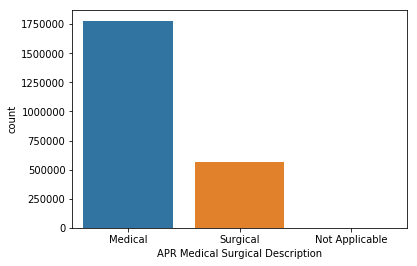

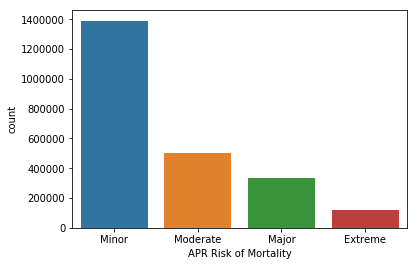

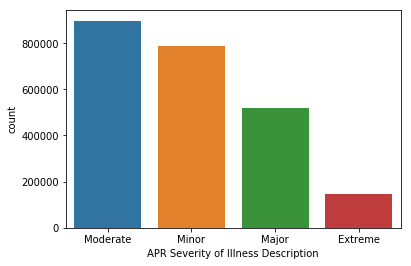

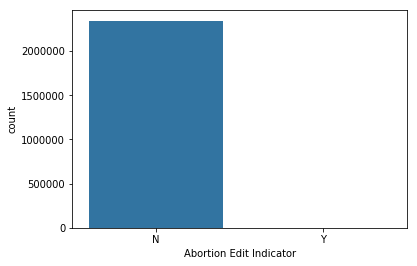

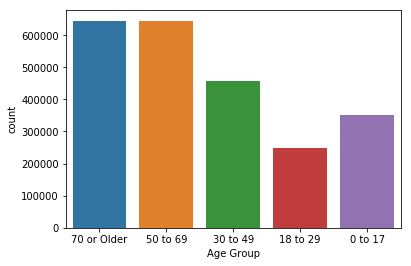

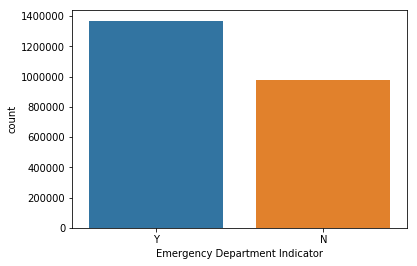

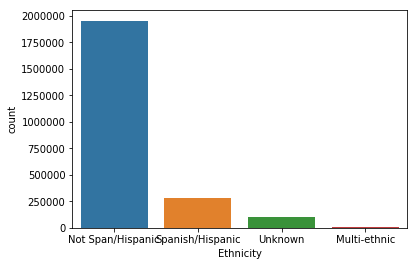

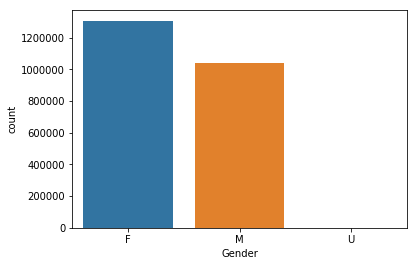

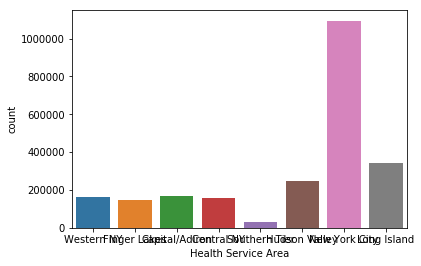

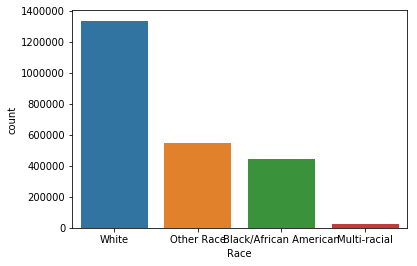

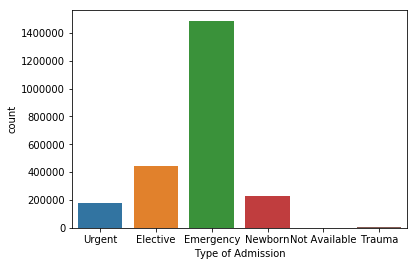

In [46]:
cat_columns = ["APR Medical Surgical Description", "APR Risk of Mortality", "APR Severity of Illness Description",
              "Abortion Edit Indicator", "Age Group", "Emergency Department Indicator", "Ethnicity", "Gender",
              "Health Service Area", "Race","Type of Admission"]
for i, col in enumerate(sparcs_df[cat_columns]):
    plt.figure(i)
    sns.countplot(x=col, data=sparcs_df)

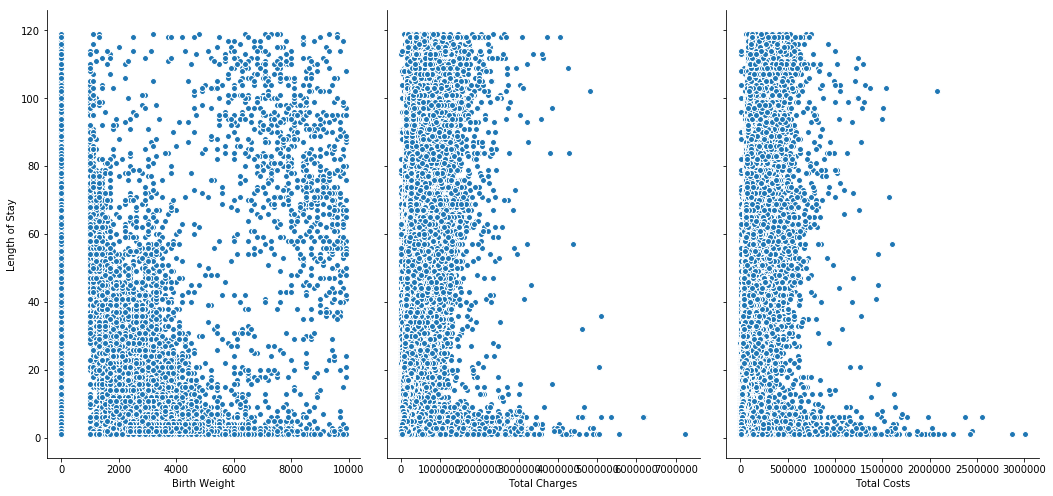

In [47]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(sparcs_df, x_vars=['Birth Weight','Total Charges','Total Costs'], y_vars='Length of Stay', size=7, aspect=0.7)

## Predict Length of Stay using a Regression machine learning model

In [5]:
# Split data into features and target
X =  sparcs_df[sparcs_df.columns.difference(["Length of Stay", "CCS Procedure Description"])]
Y = sparcs_df["Length of Stay"]
print(X.shape)
print(Y.shape)

(2346931, 14)
(2346931,)


In [6]:
train_quant= X.select_dtypes(include=[np.float64,np.int64])
train_categorical= X.select_dtypes(include=[np.object])
train_categorical= pd.get_dummies(train_categorical)
train_categorical.head()
train_features= pd.concat([train_categorical, train_quant], axis=1)
X =  train_features
print(X.shape)

(2346931, 48)


In [7]:
#Split data into training and test sets
test_size = 0.30
#validation_size=0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print (X_train.shape, Y_train.shape)
#print (X_validation.shape, Y_validation.shape)
print (X_test.shape, Y_test.shape)

(1642851, 48) (1642851,)
(704080, 48) (704080,)


In [ ]:
seed = 7
scoring = 'neg_mean_squared_error'
# Evaluate training accuracy
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Elastic Net', ElasticNet()))
#models.append(('KNN',  KNeighborsRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor))
#models.append(('Support Vector', SVR()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -30.835553 (0.848584)


/Users/geoffrey.kip/anaconda/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.846800335704746e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/geoffrey.kip/anaconda/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.822209677123041e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/geoffrey.kip/anaconda/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.834477803570321e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/geoffrey.kip/anaconda/envs/py36/lib/python3.6/site-packages/scipy/linalg/ba

Ridge: -30.835566 (0.848605)
Lasso: -33.172200 (0.912768)


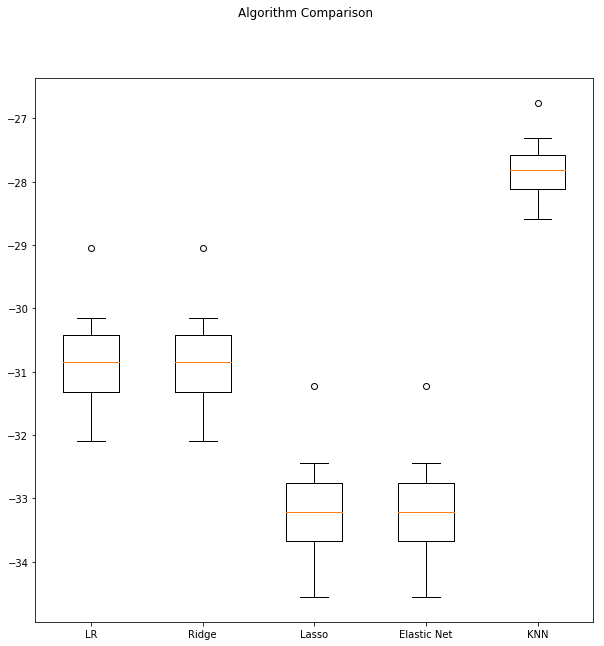

In [56]:
# Compare Algorithms
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

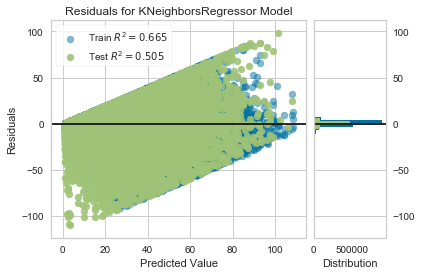

In [18]:
# Instantiate the linear model and visualizer. Plot residuals of the model to check predictions vs actual values
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, Y_train)  # Fit the training data to the model
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.poof()                 

In [8]:
# Fit KNN regressor
model =  KNeighborsRegressor()
model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [10]:
#Predict with algorithm
predictions = model.predict(X_test)

In [77]:
print(mean_absolute_error(Y_test,predictions))
print(mean_squared_error(Y_test,predictions))
print(r2_score(Y_test,predictions))

2.5630118736507215
27.453949607999093
0.5048891764294108


In [15]:
prediction_df= pd.DataFrame(predictions, columns=["prediction"])
real_df= pd.DataFrame(Y_test).reset_index(drop=True)
comparison_data= pd.merge(real_df , prediction_df, how='left', left_index=True, right_index=True)
comparison_data["Residual"] = comparison_data["Length of Stay"] - comparison_data["prediction"]
comparison_data.head(50)

,Length of Stay,prediction,Residual
0,9.00,11.60,-2.60
1,3.00,4.20,-1.20
2,6.00,4.20,1.80
3,3.00,3.00,0.00
4,3.00,3.60,-0.60
5,4.00,1.80,2.20
6,3.00,7.80,-4.80
7,3.00,3.00,0.00
8,4.00,3.20,0.80
9,30.00,13.00,17.00


## Predict Procedure type using a Classification Model for Multiclass classification

In [7]:
Y = sparcs_df["CCS Procedure Description"]
print(X.shape)
print(Y.shape)

#Split data into training and test sets
test_size = 0.30
#validation_size=0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print (X_train.shape, Y_train.shape)
#print (X_validation.shape, Y_validation.shape)
print (X_test.shape, Y_test.shape)

(2346931, 48)
(2346931,)
(1642851, 48) (1642851,)
(704080, 48) (704080,)


In [ ]:
seed = 7
scoring = 'f1'
# Evaluate training accuracy
models = []
models.append(('XGBOOST', XGBClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RANDOM FOREST', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Text(0,0.5,'Feature Importance Score')

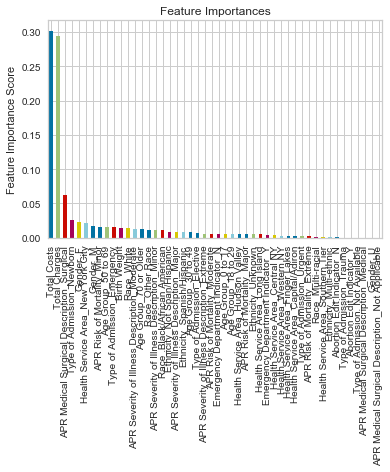

In [8]:
model =  DecisionTreeClassifier()
model.fit(X_train, Y_train)

feat_imp = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [12]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
score_test = metrics.f1_score(Y_test, predictions,
                              pos_label=list(set(Y_test)), average = None)

0.42605811839563684
[[100625  14520   1493   2937      3   4478   3701   3916   1115    512
    4579      0    642      3   3306   2223   2667   2558      0   2597
       0   1632   1184      1    222   1184     74      8  27556]
 [ 13674  10966    667    774    134   2498    870   1449    296    325
    1426     56    294     61    900    711   1107   1528     48    849
      81   1033    415     84    189    485     51     33  11461]
 [  1450    709  13046     28    467     16    214    266      0      0
     100      0   4170      2     33     18     24     47      1      6
       1     22     30     14      2     50      3     15   4237]
 [  2972    851     24  13843      1    428     27     36   2217   3086
      50      1     12      0     37     20     54     70      0     25
       0     17     14      0      4     31      1      0    586]
 [     4    130    472      1  17623      3      0      0      0      1
      12     43     77     45      1      4      0      0     97    

/Users/geoffrey.kip/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1045: UserWarning: Note that pos_label (set to [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31]) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [13]:
print(score_test)

[0.55420466 0.20741049 0.5223519  0.56369744 0.78987943 0.24060387
 0.56173064 0.33904786 0.61690018 0.54602093 0.04938977 0.39542582
 0.28351741 0.30563978 0.0359054  0.09311888 0.0602491  0.07289913
 0.29193667 0.05618202 0.28820302 0.05845292 0.25688073 0.15936786
 0.05002542 0.1763474  0.18817387 0.31107758 0.4625221 ]
